In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# مقدمة إلى قاعدة بيانات الأخبار العربية والتعرف عليها في بايثون


In [172]:
df = pd.read_csv('arabic_dataset_classifiction.csv' , encoding='utf-8')

In [173]:
df.head()

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


In [174]:
df.columns = ['text', 'target']

In [175]:
df['category'] =  df['target']

In [176]:
numbers_to_categories={ 0 : 'art culture',
                        1 : 'politics',
                        2 : 'economy',
                        3 : 'diverse' , 
                        4 : ' sports'
                      }

In [177]:
df['category'].replace(numbers_to_categories  ,inplace =True)

In [178]:
df.head()

,text,target,category
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0,art culture
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0,art culture
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0,art culture
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0,art culture
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0,art culture


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111728 entries, 0 to 111727
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      108789 non-null  object
 1   target    111728 non-null  int64 
 2   category  111728 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [180]:
df.dropna(inplace=True)

In [181]:
df.drop_duplicates(inplace=True)

In [182]:
df['category'].value_counts()

 sports        42697
diverse        19818
politics       15965
economy        13708
art culture    13398
Name: category, dtype: int64

In [183]:
df['text'].loc[0:4].tolist()

['بين أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ثم الرباط والبيضاء انتهى المخرج المغربي سهيل بن بركة من تصوير مشاهد عمله السينمائي الجديد الذي خصصه لتسليط الضوء عن حياة الجاسوس الإسباني دومينغو باديا الذي عاش فترة من القرن التاسع عشر بالمغرب باسم علي باي هذا الفيلم الذي اختار له مخرجه عنوان حلم خليفة يصور حياة علي باي العباسي الذي ما زال أحد أحياء طنجة يحمل اسمه عاش حياة فريدة متنكرا بشخصية تاجر عربي من سلالة الرسول صلى الله عليه وسلم فيما كان يعمل جاسوسا لحساب إسبانيا وكشف مخرج الفيلم سهيل بن بركة في تصريح لهسبريس أن الفيلم السينمائي دخل مرحلة التوضيب التي تتم خارج المغرب مبرزا أن الفيلم الذي يروي حياة الجاسوس الإسباني دومينغو باديا منذ أن قرر من طنجة بدء رحلاته نحو عدد من المناطق في العالم الإسلامي بداية القرن العشرين سيكون جاهزا بعد شهرين ويجمع الفيلم السينمائي عددا من الممثلين من مختلف الجنسيات واختار لدور البطولة الممثلة السينمائية الإيطالية كارولينا كريشنتيني للقيام بدور الإنجليزية الليدي هستر ستانهوب التي اشتهرت في الكتب الغربية بـ زنوبيا والتي عاشت بدورها بالدول العربية وارت

In [184]:
df_sub = df.sample(1000).copy()

In [185]:
df_sub.head()

,text,target,category
35472,منح مكتب الصرف امتيازا خاصا للشركات التي تحوز ...,2,economy
174,قال رضى البرادي مدير أعمال المغني المغربي سعد ...,0,art culture
4469,فتحت السلطات الجزائرية تحقيقا في ما وصفته أوسا...,0,art culture
48751,قال مصدر من وزارة الداخلية ضمن تصريح لهسبريس إ...,3,diverse
2004,أخبارنا المغربية يشكل موضوع الإرث العربي الأند...,0,art culture


# أساسيات التعامل مع النصوص في بايثون


In [186]:
def count_words(text):
    return len(text.split(' '))

In [187]:
count_words('this text has five words')

5

In [188]:
df_sub['text'].apply(count_words)

35472    307
174      115
4469     175
48751    871
2004     400
        ... 
57307    158
92193    374
20106    122
65461    117
98025    205
Name: text, Length: 1000, dtype: int64

In [189]:
df_sub['number_of_words'] = df_sub['text'].apply(lambda x : len(x.split(' ')))

In [190]:
df_sub

,text,target,category,number_of_words
35472,منح مكتب الصرف امتيازا خاصا للشركات التي تحوز ...,2,economy,307
174,قال رضى البرادي مدير أعمال المغني المغربي سعد ...,0,art culture,115
4469,فتحت السلطات الجزائرية تحقيقا في ما وصفته أوسا...,0,art culture,175
48751,قال مصدر من وزارة الداخلية ضمن تصريح لهسبريس إ...,3,diverse,871
2004,أخبارنا المغربية يشكل موضوع الإرث العربي الأند...,0,art culture,400
...,...,...,...,...
57307,أكد بنكيران على أن مصير ولاية حكومته معلق بـ ا...,3,diverse,158
92193,عميد الـ كاك قال إن مسيرين انشغلوا بالرئاسة أك...,4,sports,374
20106,تمكنت عناصر الشرطة بميناء طنجة المتوسط مساء أم...,1,politics,122
65461,حجز فريق بوروسيا دورتموند الألماني بطاقة التأه...,4,sports,117


In [191]:
mytext = 'وقد بلغ عدد الايرادات 45 مليون بمعدل 5 مليون لكل شهر'

In [192]:
mytext.isdigit()

False

In [193]:
mytext.split(' ')

['وقد',
 'بلغ',
 'عدد',
 'الايرادات',
 '45',
 'مليون',
 'بمعدل',
 '5',
 'مليون',
 'لكل',
 'شهر']

In [194]:
digits=[]
for s in mytext.split(' '):
    digits.append(s.isdigit())

In [195]:
digits

[False, False, False, False, True, False, False, True, False, False, False]

In [196]:
np.sum(digits)

2

In [197]:
#طريقة مختصره
np.sum( [s.isdigit() for s in mytext.split(' ') ] )

2

In [198]:
def count_digits(text):
    return np.sum( [s.isdigit() for s in text.split(' ')] )

In [199]:
df_sub['text'].apply(count_digits)

35472    0
174      0
4469     0
48751    0
2004     0
        ..
57307    0
92193    0
20106    0
65461    0
98025    0
Name: text, Length: 1000, dtype: int32

In [200]:
df.text[df['category']=='economy'].head().tolist()

['وقعت شركة أليانس هوسبيتاليتي ”، فرع الاستثمار الفندقي والسياحي التابع لمجموعة أليانس للتطوير العقاري اتفاقية شراكة مع البنك الأوربي لإعادة الإعمار والتنمية يهم تمويلا على شكل مساهمة في رأس المال من أجل تمويل مشاريع بناء وحدات فندقية من صنف ثلاثة وأربعة نجوم إذ تبلغ الكلفة الاستثمارية لبناء فنادق في مدن الدار البيضاء والرباط ومراكش وطنجة وكذا وجدة مليون أورو سيؤمن البنك الأوربي عشرة ملايين أورو من هذا الغلاف الاستثماري فيما ستخصص الشركة العقارية مليون أورو لتبلغ التكلفة الاستثمارية المبدئية مليون أورو وأكد محمد علمي لزرق رئيس الإدارة الجماعية لشركة أليانس للتطوير العقاري إحداث شركة تحت اسم أليانس هوتيل أنفستستمنت من أجل تدبير مشروع السياحي المشترك إذ تبلغ حصة الفاعل العقاري في رأسمال الشركة الجديدة في المائة مقابل حصة في المائة لفائدة البنك الأوربي لإعادة الإعمار والتنمية فيما سيتم تطوير أولى الوحدات الفندقية في الدار البيضاء ومراكش مشيرا في تصريحات لـ الصباح »، إلى أن الشركة تنتظر حاليا التراخيص الإدارية الضرورية لبدء أشغال البناء خصوصا مشروع فندق الدار البيضاء الذي سيتألف من طابقا و

In [201]:
num_to_text_combined='واحد اثنان ثلاثة أربعة خمسة أربع خمس ستة ست سبعة سبع ثمانية ثمان تسعه تسع عشرة عشر إحدى احدى اثنا عشر عشرين عشرون ثلاثين ثلاثون أربعين أربعون اربعين اربعون خمسين خمسون ستين ستون سبعين سبعون ثمانين ثملنون تسعين تسعون مئة مائة مئتين مئتي ألف الف ألفين الفين آلاف الاف مليون ملايين مليار'

In [202]:
num_to_text_combined

'واحد اثنان ثلاثة أربعة خمسة أربع خمس ستة ست سبعة سبع ثمانية ثمان تسعه تسع عشرة عشر إحدى احدى اثنا عشر عشرين عشرون ثلاثين ثلاثون أربعين أربعون اربعين اربعون خمسين خمسون ستين ستون سبعين سبعون ثمانين ثملنون تسعين تسعون مئة مائة مئتين مئتي ألف الف ألفين الفين آلاف الاف مليون ملايين مليار'

In [203]:
num_to_text_list = num_to_text_combined.split(' ')
num_to_text_list

['واحد',
 'اثنان',
 'ثلاثة',
 'أربعة',
 'خمسة',
 'أربع',
 'خمس',
 'ستة',
 'ست',
 'سبعة',
 'سبع',
 'ثمانية',
 'ثمان',
 'تسعه',
 'تسع',
 'عشرة',
 'عشر',
 'إحدى',
 'احدى',
 'اثنا',
 'عشر',
 'عشرين',
 'عشرون',
 'ثلاثين',
 'ثلاثون',
 'أربعين',
 'أربعون',
 'اربعين',
 'اربعون',
 'خمسين',
 'خمسون',
 'ستين',
 'ستون',
 'سبعين',
 'سبعون',
 'ثمانين',
 'ثملنون',
 'تسعين',
 'تسعون',
 'مئة',
 'مائة',
 'مئتين',
 'مئتي',
 'ألف',
 'الف',
 'ألفين',
 'الفين',
 'آلاف',
 'الاف',
 'مليون',
 'ملايين',
 'مليار']

In [204]:
def count_digits(text):
    return np.sum( [np.isin(s, num_to_text_list) for s in text.split(' ') ])

In [205]:
df_sub['number_of_quant'] = df_sub['text'].apply(count_digits)

In [206]:
df_sub.head(5)

,text,target,category,number_of_words,number_of_quant
35472,منح مكتب الصرف امتيازا خاصا للشركات التي تحوز ...,2,economy,307,4
174,قال رضى البرادي مدير أعمال المغني المغربي سعد ...,0,art culture,115,0
4469,فتحت السلطات الجزائرية تحقيقا في ما وصفته أوسا...,0,art culture,175,0
48751,قال مصدر من وزارة الداخلية ضمن تصريح لهسبريس إ...,3,diverse,871,0
2004,أخبارنا المغربية يشكل موضوع الإرث العربي الأند...,0,art culture,400,0


In [207]:
df_sub.groupby('category').mean()['number_of_quant']

category
 sports        1.100543
art culture    0.925170
diverse        0.676923
economy        2.705426
politics       1.080745
Name: number_of_quant, dtype: float64

# تمرين تجهيز النصوص


In [208]:
mytext=  ' @@ ! أهلاً ، كَيْفَ حَالُك ؟ وَمَا هي إخْبَارِك ؟ هَل تحبني . '

In [209]:
import re
def clean_text(text):
    noise= re.compile("""  ّ  | # Tashdid
                         َ    | # Fatha
                        ً     | # Tanwin Fath
                       ُ      | # Damma
                      ٌ       | # Tanwin Damm
                        ِ     | # Kesra
                     ٍ        | # Tanwin Kasr
                    ْ         | # Sukun
                   _        | #Tatwil
                        """,re.VERBOSE)
    text=re.sub(noise , '' , text)
    text = re.sub(r'[@;,:%!؟۰۱۲۳؟٤,٥٦،٧۸۹.]+' ,  '' , text , flags=re.UNICODE)
    return text 

In [210]:
print('Before:\n ', mytext , '\nAfter:\n ', clean_text(mytext))

Before:
   @@ ! أهلاً ، كَيْفَ حَالُك ؟ وَمَا هي إخْبَارِك ؟ هَل تحبني .  
After:
     أهلا  كيف حالك  وما هي إخبارك  هل تحبني  


In [211]:
mytext=clean_text(mytext)
mytext

'   أهلا  كيف حالك  وما هي إخبارك  هل تحبني  '

In [216]:
def normalize_arabic(text):
    text=re.sub( 'ي' , 'ى' , text , re.UNICODE)
    text=re.sub( 'ؤ' ,'ء'   , text , re.UNICODE)
    text=re.sub( 'ئ','ء'    , text , re.UNICODE)
    text=re.sub( '[اأآإ]','ا' ,text , re.MULTILINE)
    return text


In [217]:
normalize_arabic('أعلى        يكرم')

'اعلى        ىكرم'

In [218]:
print('Before:\n ', mytext , '\nAfter:\n ', normalize_arabic(mytext))

Before:
     أهلا  كيف حالك  وما هي إخبارك  هل تحبني   
After:
     اهلا  كىف حالك  وما هى اخبارك  هل تحبنى  


#### الخطوة الثالثة : حذف مستبعدات الفهرسة

In [219]:
import nltk

In [220]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KRM0201517\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [221]:
from nltk.corpus import stopwords
stop = stopwords.words('arabic')

In [136]:
' '.join(stop)

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [222]:
def remove_stopwords(text):
    splitted = text.split(' ')
    cleaned = [x for x in splitted if x not in stop]
    return ' '.join(cleaned)

In [223]:
remove_stopwords(' متى سنذهب إلى البيت ؟')

' سنذهب البيت ؟'

In [139]:
df_sub['text'] = df_sub['text'].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

#### استخدام جذور الكلمات

In [224]:
from nltk.stem.isri import ISRIStemmer

In [226]:
def stem_words(text):
    stemmer = ISRIStemmer()
    splitted = text.split(' ')
    cleaned = [stemmer.stem(x) for x in splitted]
    return ' '.join(cleaned)

In [228]:
stem_words('الحروب في المدمرة ')

'حرب في دمر '

In [229]:
stem_words('عمار')

'عمر'

# مشكلة تمثيل النصوص و سلة الكلمات


In [230]:
sentences = [' الشر كامن في الانسان' ,
            'كذلك الخير كامن في الانسان',
            'ما أعجب هذا الانسان',
            'ايها الانسان من راك']

In [231]:
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
vec = CountVectorizer()
X = vec.fit_transform(sentences)
X.toarray()



array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [233]:
import pandas as pd
bag_of_words = pd.DataFrame(X.toarray() , columns=vec.get_feature_names())
bag_of_words

,أعجب,الانسان,الخير,الشر,ايها,راك,في,كامن,كذلك,ما,من,هذا
0,0,1,0,1,0,0,1,1,0,0,0,0
1,0,1,1,0,0,0,1,1,1,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,1,0,0,0,0,1,0


In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sentences)
bag_of_words = pd.DataFrame(X.toarray() , columns=vec.get_feature_names())
np.round(bag_of_words,2)

,أعجب,الانسان,الخير,الشر,ايها,راك,في,كامن,كذلك,ما,من,هذا
0,0.00,0.33,0.00,0.63,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00
1,0.00,0.28,0.53,0.00,0.00,0.00,0.42,0.42,0.53,0.00,0.00,0.00
2,0.55,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.55
3,0.00,0.29,0.00,0.00,0.55,0.55,0.00,0.00,0.00,0.00,0.55,0.00


# تمرين تصنيف النصوص


In [237]:
df.dropna(inplace = True)

In [239]:
df['text'] = df['text'].apply(normalize_arabic)
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(stem_words)

In [240]:
df.head()

,text,target,category
0,بىن استودىوه رزز صحراء رزك اثر ىلى ربط ىضء نهى...,0,art culture
1,قرر نجم رىكى وبر ىنفرى الا ىقتصر عمل الف عمل خ...,0,art culture
2,خبر غربى زنى صوىر شملالى لهب نجم غربى دوزى حمس...,0,art culture
3,خبر غربى قال راهىم راشدى حمى سعد جرد ان وكل ضح...,0,art culture
4,تزل صنع جلد فى غرب تبع طرىق قلىدى ىدى خدم واد ...,0,art culture


In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=1000)
X=vec.fit_transform(df['text']) # text-document-matrix

In [247]:
y=df['target']

In [249]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [250]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

In [251]:
X_train.shape ,X_test.shape , y_train.shape , y_test.shape

((73910, 1000), (31676, 1000), (73910,), (31676,))

In [254]:
model.fit(X_train , y_train)  #مطابقة النموذج على بيانات التدريب 

MultinomialNB()

In [255]:
model.score(X_test , y_test)  # تقييم دقة النموذج 

0.9262848844551079

In [263]:
y_pred = model.predict(X_test) # نستخدم الان توقعات دقة النموذج

Text(91.68, 0.5, 'predicted label')

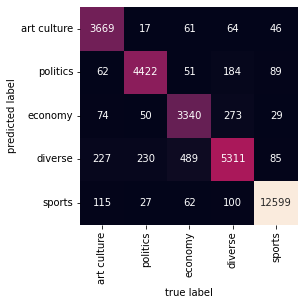

In [268]:
#وهنا نقوم برسم مصفوفة الالتباس والتي توضح مقدار التباس النموذج 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test , y_pred)
sns.heatmap(mat.T , square=True , annot=True , fmt='d' ,cbar=False ,
           xticklabels=['art culture' , 'politics' , 'economy', 'diverse' , 'sports'],
           yticklabels=['art culture' , 'politics' , 'economy', 'diverse' , 'sports'])      
plt.xlabel('true label')
plt.ylabel('predicted label') 